In [1]:
! pip install -U langgraph langchain-openai langchain langsmith


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from langgraph.prebuilt import create_react_agent
from langchain.chat_models import init_chat_model
from langgraph.checkpoint.memory import InMemorySaver

def get_weather(city:str) -> str:
    """Get weather for a given city"""
    return f"Its always rainy in {city}"


checkpointer = InMemorySaver()

model=init_chat_model(
    "gpt-4.1-mini",
    temperature=0
)

config = {"configurable": {"thread_id":"1"}}

agent=create_react_agent(
    model=model,
    tools=[get_weather],
    checkpointer=checkpointer,
    prompt="You are an helpful assistant"
)

agent.invoke({
    "messages":[{"role": "user","content":"what is weather in Hyderabad"}]
},
  config
  )

{'messages': [HumanMessage(content='what is weather in Hyderabad', additional_kwargs={}, response_metadata={}, id='9c951d50-ff39-48e9-a50f-86b2c344d0f6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_CP4eMhvLqYyo9hWzyzhZ1rPR', 'function': {'arguments': '{"city":"Hyderabad"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BeVrFBflX2TrOgfNftMTry9XIOybn', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4db7f684-dad1-479c-8901-c98cc4727cc7-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Hyderabad'}, 'id'

In [3]:
agent.invoke({
    "messages":[{"role": "user","content":"what about Rajamundry"}]
},
  config
  )

{'messages': [HumanMessage(content='what is weather in Hyderabad', additional_kwargs={}, response_metadata={}, id='9c951d50-ff39-48e9-a50f-86b2c344d0f6'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_CP4eMhvLqYyo9hWzyzhZ1rPR', 'function': {'arguments': '{"city":"Hyderabad"}', 'name': 'get_weather'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 15, 'prompt_tokens': 55, 'total_tokens': 70, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-mini-2025-04-14', 'system_fingerprint': 'fp_6f2eabb9a5', 'id': 'chatcmpl-BeVrFBflX2TrOgfNftMTry9XIOybn', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--4db7f684-dad1-479c-8901-c98cc4727cc7-0', tool_calls=[{'name': 'get_weather', 'args': {'city': 'Hyderabad'}, 'id'

In [4]:
from pydantic import BaseModel

class WeatherResp(BaseModel):
    conditions: str
    
agent= create_react_agent(
    model,
    tools=[get_weather],
    response_format=WeatherResp
)


resp=agent.invoke({
    "messages":[{"role": "user","content":"what about Rajamundry"}]
},)

In [5]:
resp["structured_response"].conditions

'Its always rainy in Rajamundry'

In [6]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph,START
from langgraph.graph import add_messages

class State(TypedDict):
    messages: Annotated[list,add_messages]
    
graph_builder=StateGraph(State)

llm=init_chat_model("openai:gpt-4.1")

def chatbot(state: State):
    return {"messages":[llm.invoke(state["messages"])]}

graph_builder.add_node("chatbot",chatbot)

graph_builder.add_edge(START,"chatbot")

graph=graph_builder.compile()


In [7]:
! pip install -U ipython


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


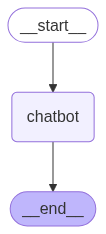

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [9]:
res=graph.invoke({"messages": ["Hi Hello how are you"]})

In [18]:
res["messages"][-1].content

"Hello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?"

In [11]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

In [22]:
stream_graph_updates("What is the Future of AI")

Assistant: The **future of AI** is one of the most discussed topics in technology, science, and society today. While no one can predict the future with complete certainty, current trends, expert insights, and research suggest several likely directions:

---

**1. Ubiquity and Integration**  
AI will become increasingly embedded in daily life—powering everything from personal assistants and smart devices to healthcare, education, transportation, and entertainment. Many AI technologies that seem novel today (like chatbots, translation, or facial recognition) will become routine and taken for granted.

---

**2. Advancements in General Intelligence**  
Today's AI is mostly "narrow" or specialized (good at specific tasks). Researchers are working towards Artificial General Intelligence (AGI), capable of understanding, learning, and reasoning across a broad range of tasks like humans. While AGI is still a long-term goal (probably decades away), incremental improvements will make AI systems 

In [23]:
stream_graph_updates("What question did I have asked you ?")

Assistant: Your latest message was: “What question did I have asked you ?”

If you're asking what your **previous question** was, that message **was itself** your first direct question to me in this conversation (unless there was an earlier message outside this chat that I cannot see). So before this, you hadn’t asked me any specific question. 

If you need to know about previous questions you asked in an earlier session or want help recalling or rephrasing a particular question, please give me more information!


In [1]:
! pip install -U langchain-tavily

     -------------------------------------- 449.1/449.1 kB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 9.5/9.5 MB 4.4 MB/s eta 0:00:00
  Using cached aiosignal-1.3.2-py2.py3-none-any.whl (7.6 kB)
     ---------------------------------------- 63.8/63.8 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 45.5/45.5 kB ? eta 0:00:00
     ---------------------------------------- 45.2/45.2 kB 1.1 MB/s eta 0:00:00
     ---------------------------------------- 93.4/93.4 kB 2.7 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install dotenv


[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from dotenv import load_dotenv

load_dotenv()

True

In [13]:
import os
os.getenv("TAVILY_API_KEY")

'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'

In [14]:
from langchain_tavily import TavilySearch

tool=TavilySearch(max_results=2,
                  api_key=os.getenv("TAVILY_API_KEY"))
tools=[tool]

tool.invoke("Who is the current president of the USA")

{'error': ValueError('Error 401: Unauthorized: missing or invalid API key.')}

NameError: name '_set_env' is not defined